In [1]:
# Nielson, Seth James; Monson, Christopher K..
# Practical Cryptography in Python: Learning Correct Cryptography by Example (p. 23).
# Apress. Edição do Kindle.
# KATs from https://csrc.nist.gov/CSRC/media/Projects/Cryptographic-Algorithm-Validation-Program/documents/aes/KAT_AES.zip.
# ECB - Not Secure
# KAT - Known answer tests

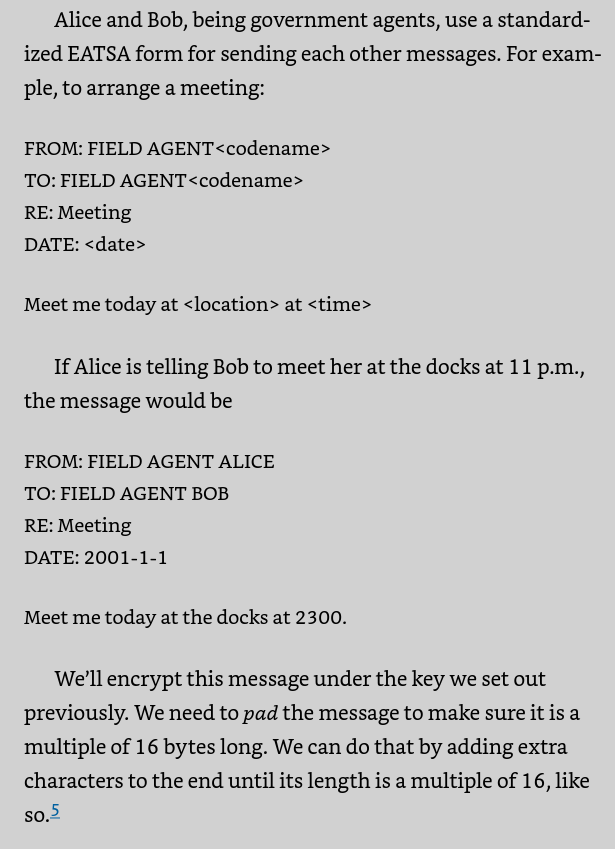

In [2]:
# NEVER USE: ECB is not secure!
from cryptography.hazmat.primitives.ciphers import Cipher, algorithms, modes
from cryptography.hazmat.backends import default_backend
# Alice and Bob's Shared Key
test_key = bytes.fromhex('00112233445566778899AABBCCDDEEFF')
aesCipher = Cipher(algorithms.AES(test_key),
                   modes.ECB(),
                   backend=default_backend())
aesEncryptor = aesCipher.encryptor()
aesDecryptor = aesCipher.decryptor()
message = b"""
FROM: FIELD AGENT ALICE
TO: FIELD AGENT BOB
RE: Meeting
DATE: 2001-1-1
Meet me today at the docks at 2300."""
message += b"E" * (-len(message) % 16)
ciphertext = aesEncryptor.update(message)
print (ciphertext.hex())
dcyphertext = aesDecryptor.update(ciphertext)
print (dcyphertext.decode())

message2 = b"""
FROM: FIELD AGENT ALICE
TO: FIELD AGENT BOB
RE: Meeting
DATE: 2001-1-2
Meet me today at the town squares at 1100."""
message2 += b"E" * (-len(message2) % 16)
ciphertext2 = aesEncryptor.update(message2)
print (ciphertext2.hex())
dcyphertext2 = aesDecryptor.update(ciphertext2)
print (dcyphertext2.decode())

# Blocos iguais, cifra igual, encription igual


0aee9b602c574044778d4f6de3481cb90f3b683d1af60ed69396949eaf293eb244760fa0bb791339d557b43b250ac27c8430e159229e4bf5c7b39fe1fb72cfab8fb76a5e9e6ab8b1596aebc2acb29703ee0c3ea2b40c09d80e9558cacf1a60ef77157857afc453a4276142aa0eadf1ee

FROM: FIELD AGENT ALICE
TO: FIELD AGENT BOB
RE: Meeting
DATE: 2001-1-1
Meet me today at the docks at 2300.EEEEE
0aee9b602c574044778d4f6de3481cb90f3b683d1af60ed69396949eaf293eb244760fa0bb791339d557b43b250ac27c8430e159229e4bf5c7b39fe1fb72cfabcb838a541f37813c020d6043507454baf70cc1a151a388f34c59b7b83ae0fb08374f3f8d66e4f02ecdf4b23520881ec19ff8e0d822c75122aa6df1fa6aa2be71

FROM: FIELD AGENT ALICE
TO: FIELD AGENT BOB
RE: Meeting
DATE: 2001-1-2
Meet me today at the town squares at 1100.EEEEEEEEEEEEEE


In [4]:
# Partial Listing: Some Assembly Required
from PIL import Image
ifile="Turma25OP04.bmp"
ofile="Turma25OP04Encripted.bmp"
#
#
#
with open(ifile, "rb") as reader:
  with open(ofile, "wb+") as writer:
       image_data = reader.read()
       #image_data = bytearray(image_dados)
       #print (image_data)
       header, body = image_data[:53], image_data[54:]
       body += b"\x00"*(16-(len(body)%16))
       writer.write(header + aesEncryptor.update(body))



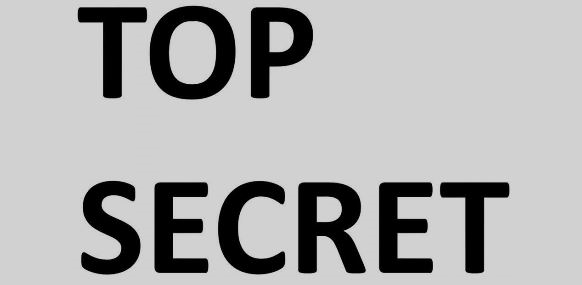

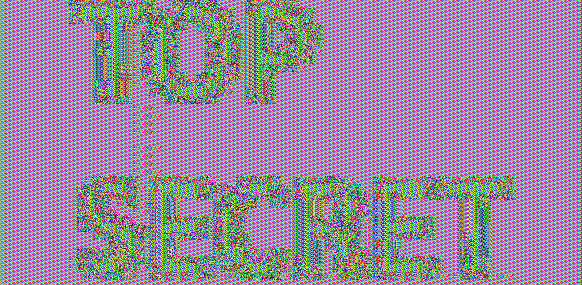